In [205]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [206]:
df = pd.read_csv('mock_kaggle.csv')
df = df.rename(columns={'data': 'date','venda': 'sold', 'estoque': 'stock', 'preco': 'price'})

In [207]:
df

,date,sold,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
...,...,...,...,...
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39


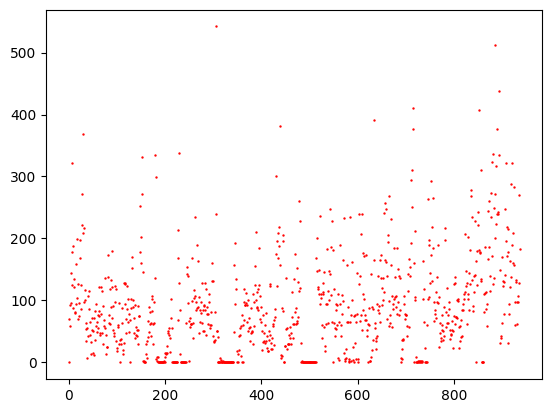

In [208]:
# df.sold.plot()

x_sold = df.index
y_sold = df.sold

plt.scatter(x_sold, y_sold, s=0.5, color='red')

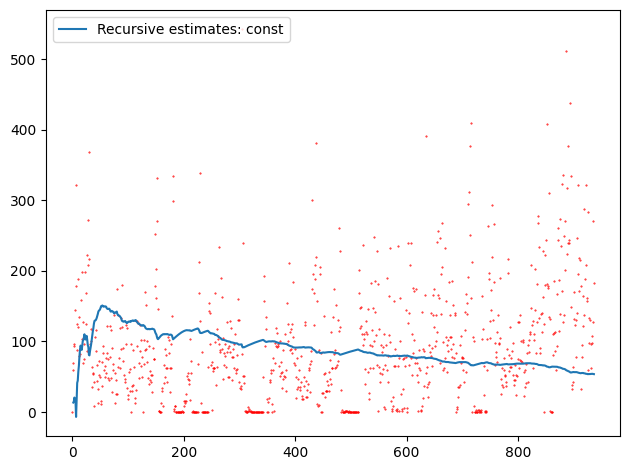

In [209]:
endog_sold = y_sold
exog_sold = sm.add_constant(x_sold)

model_sold = sm.RecursiveLS(endog_sold, exog_sold)
res_sold = model_sold.fit()

res_sold.plot_recursive_coefficient(alpha=None)
plt.scatter(x_sold, y_sold, s=0.2, color='red')

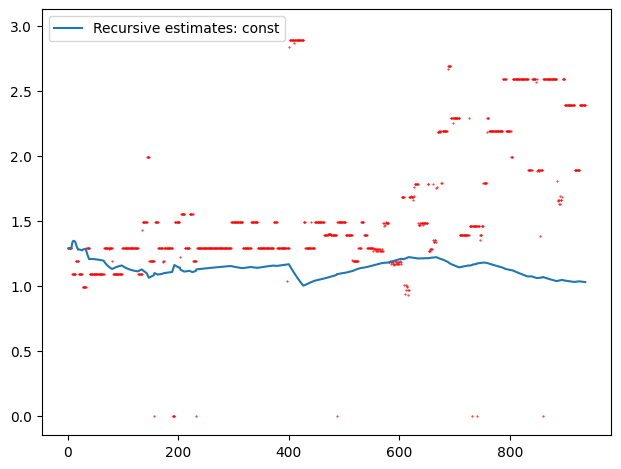

In [210]:
x_price = df.index
y_price = df.price

endog_price = y_price
exog_price = sm.add_constant(x_price)

model_price = sm.RecursiveLS(endog_price, exog_price)
res_price = model_price.fit()

res_price.plot_recursive_coefficient(alpha=None)
plt.scatter(x_price, y_price, s=0.2, color='red')


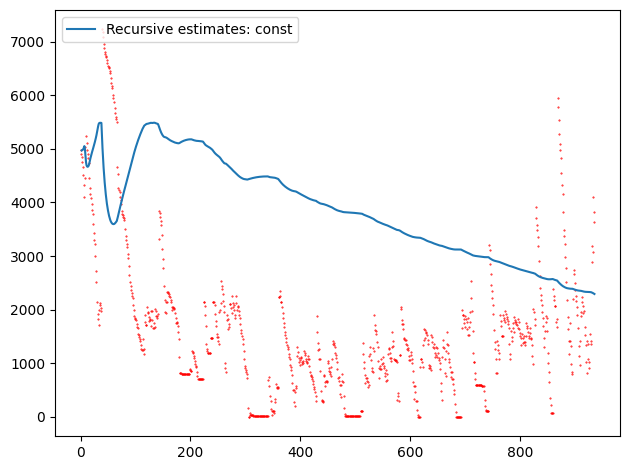

In [211]:
x_stock = df.index
y_stock = df.stock

endog_stock = y_stock
exog_stock = sm.add_constant(x_stock)

model_stock = sm.RecursiveLS(endog_stock, exog_stock)
res_stock = model_stock.fit()

res_stock.plot_recursive_coefficient(alpha=None)
plt.scatter(x_stock, y_stock, s=0.2, color='red')


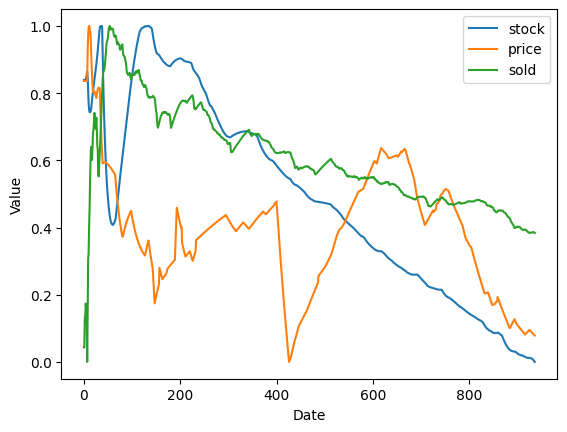

In [212]:
from statsmodels.graphics.factorplots import interaction_plot


res_stock_coefs = res_stock.recursive_coefficients.filtered[0]
res_price_coefs = res_price.recursive_coefficients.filtered[0]
res_sold_coefs = res_sold.recursive_coefficients.filtered[0]


res_stock_coefs = np.interp(res_stock_coefs, (res_stock_coefs.min(), res_stock_coefs.max()), (0, 1))
res_price_coefs = np.interp(res_price_coefs, (res_price_coefs.min(), res_price_coefs.max()), (0, 1))
res_sold_coefs = np.interp(res_sold_coefs, (res_sold_coefs.min(), res_sold_coefs.max()), (0, 1))


plt.plot(res_stock_coefs, label='stock')
plt.plot(res_price_coefs, label='price')
plt.plot(res_sold_coefs, label='sold')
plt.legend()


plt.xlabel("Date")
plt.ylabel("Value")


plt.show()